In [10]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

import mlgrad.funcs as funcs
# import mlgrad.avragg as avragg
# import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad.af import averaging_function
import mlgrad.cluster as cluster

# from mlgrad import averager_it

import mlgrad.af as af

import numpy as np
import matplotlib.pyplot as plt
# plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import pandas as pd

import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True

In [11]:
N = 500
CC = np.array([[0,0],[10,20],[40,10]], 'd')

In [12]:
phi_r1 = 2 * np.pi * np.random.rand(N)
R_r1 = (15 / (1 - 0.7*np.cos(phi_r1+np.pi/3))) * np.random.rand(N)
X1 = R_r1 * np.cos(phi_r1) + CC[0,0]
Y1 = R_r1 * np.sin(phi_r1) + CC[0,1]

In [13]:
phi_r2 = 2 * np.pi * np.random.rand(N)
R_r2 = (15 / (1 - 0.75*np.cos(phi_r2-np.pi/3))) * np.random.rand(N)
X2 = R_r2 * np.cos(phi_r2) + CC[1,0]
Y2 = R_r2 * np.sin(phi_r2) + CC[1,1]

In [14]:
phi_r3 = 2 * np.pi * np.random.rand(N)
R_r3 = (15 / (1 - 0.8*np.cos(phi_r3+np.pi/6))) * np.random.rand(N)
X3 = R_r3 * np.cos(phi_r3) + CC[2,0]
Y3 = R_r3 * np.sin(phi_r3) + CC[2,1]

In [15]:
X = np.hstack((X1,X2,X3))
Y = np.hstack((Y1,Y2,Y3))
XY = np.c_[X,Y]

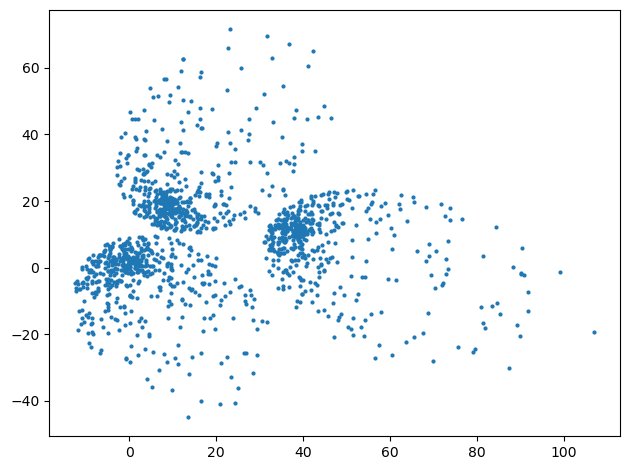

In [16]:
plt.scatter(X, Y, s=4)
plt.show()

In [17]:
# # avgmin = avragg.SoftMinimal(0.05)
# avgmin = avragg.Minimal()
# avrfunc = af.averaging_function("WM", funcs.QuantileFunc(0.75, funcs.SoftAbs_Sqrt(0.001)))
# hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, avgmin, 3, 
#                                     tol=1.0e-9, n_iter=500, normalize_S=1)

In [76]:
avrfunc = averaging_function("WM", 
                             rhofunc=funcs.QuantileFunc(0.7, funcs.SoftAbs_Sqrt(0.001)))
hcd = cluster.RKMeansMahalanobis(3, avrfunc)

In [77]:
hcd.fit(XY) #, only='locations')

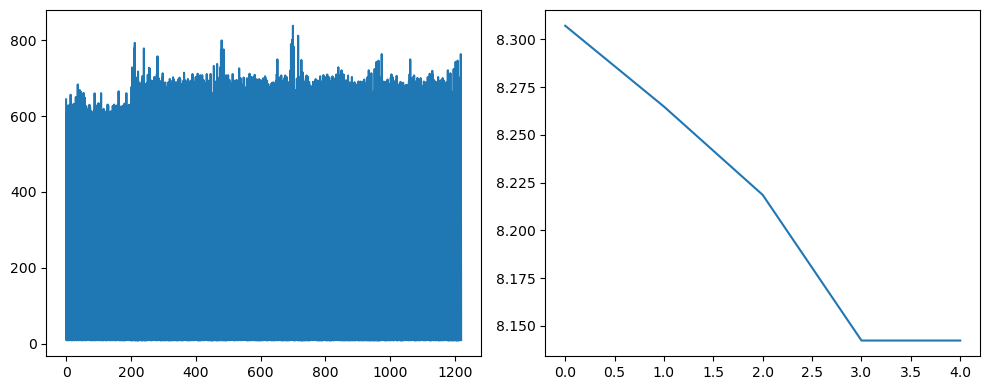

In [78]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hcd.qvals)
plt.subplot(1,2,2)
plt.plot(hcd.qvals2)
plt.show()

In [79]:
hcd.qvals2

[np.float64(8.307128021538121),
 np.float64(8.26479152268857),
 np.float64(8.218535480842242),
 np.float64(8.142301325434524),
 np.float64(8.142301325434524)]

In [80]:
xrange1 = np.linspace(X.min(), X.max(), 100)
xrange2 = np.linspace(Y.min(), Y.max(), 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]

D = hcd.eval_dists(XX)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())
# plt.plot(sorted(np.sqrt(D)))

0.1911810301277406 8429.033966920775


[[ 0.  0.]
 [10. 20.]
 [40. 10.]]
[[38.815  9.981]
 [-1.009 -0.176]
 [ 9.450 18.930]]


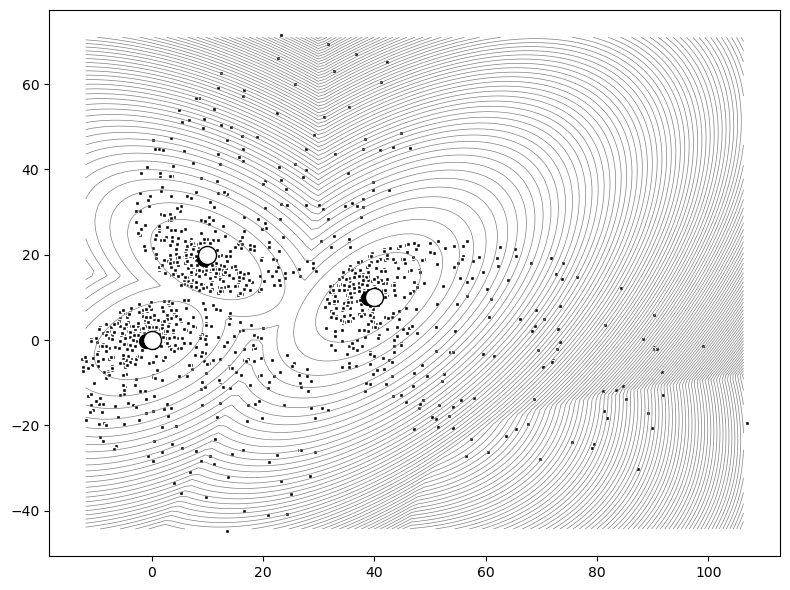

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(XY[:,0], XY[:,1], c='k', edgecolors='w', marker='s', s=9)
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.0,D.max(),100), colors='grey', linewidths=0.5)
plt.scatter(hcd.c[:,0], hcd.c[:,1], c='k', edgecolors='k', s=100)
plt.scatter(CC[:,0], CC[:,1], c='w', edgecolors='k', s=169, linewidths=1.0, label='ФОКУС')
print(CC)
print(hcd.c)
plt.show()

In [87]:
km = cluster.KMeansMahalanobis(3)

In [88]:
km.fit(XY) #, only='locations')

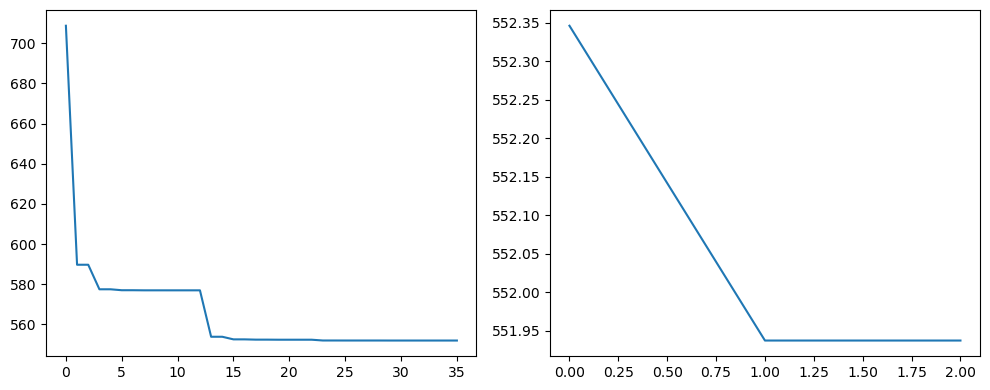

In [89]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.qvals)
plt.subplot(1,2,2)
plt.plot(km.qvals2)
plt.show()

In [90]:
D2 = km.eval_dists(XX)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())
# plt.loglog(sorted(np.sqrt(D2)))

0.052922523416468144 12371.08308226092


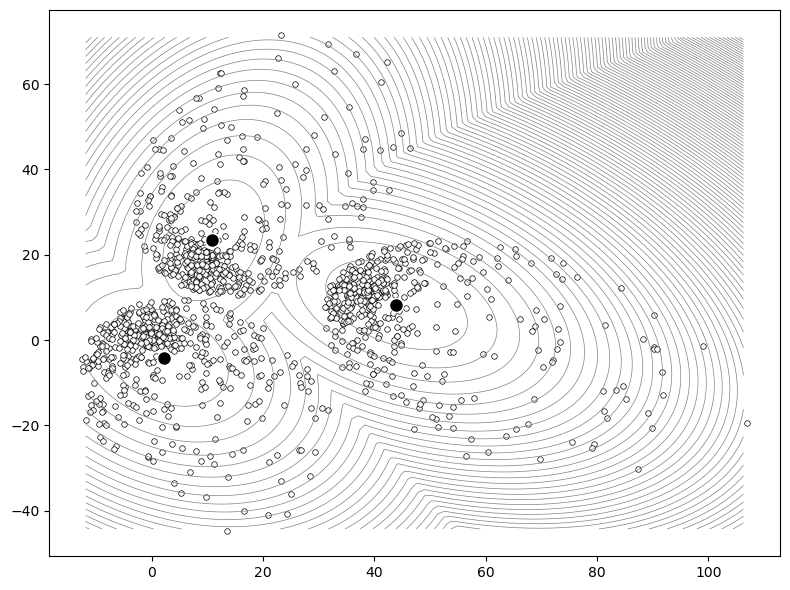

In [91]:
plt.figure(figsize=(8,6))
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='w', edgecolors='k', marker='o', linewidth=0.5,  s=16)
plt.scatter(km.c[:,0], km.c[:,1], c='k', edgecolors='w', s=100)
plt.show()

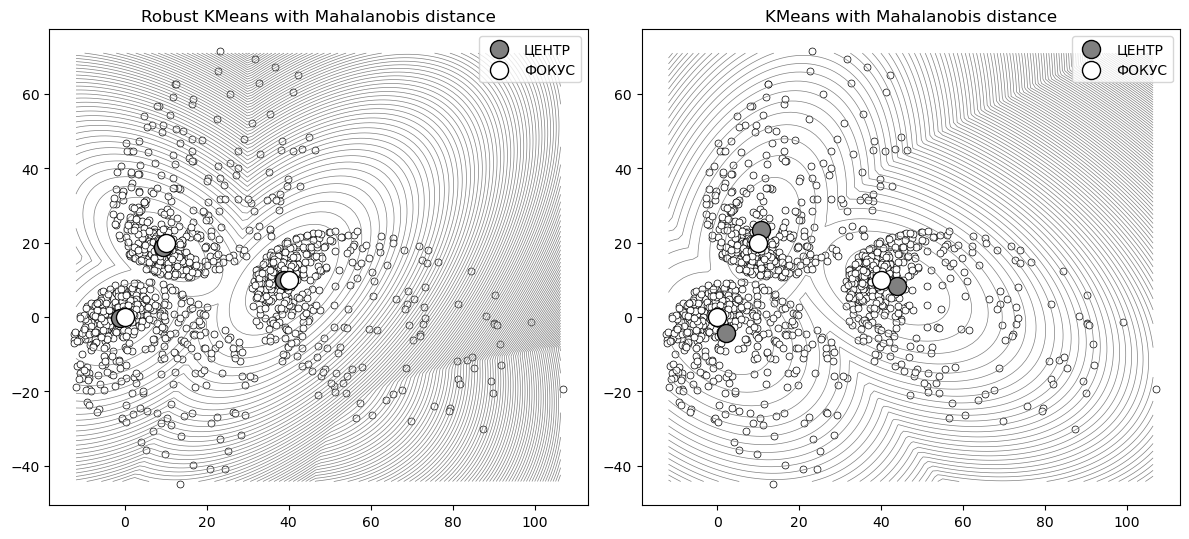

In [92]:
plt.figure(figsize=(12,5.5))

plt.subplot(1,2,1)
# plt.title('Robust algorithm')
plt.title('Robust KMeans with Mahalanobis distance')
plt.contour(DD, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D.max(),100), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='w', edgecolors='k', marker='o', linewidth=0.5, s=25)
plt.scatter(hcd.c[:,0], hcd.c[:,1], c='grey', edgecolors='k', s=169, linewidths=1.0, label='ЦЕНТР')
plt.scatter(CC[:,0], CC[:,1], c='w', edgecolors='k', s=169, linewidths=1.0, label='ФОКУС')
plt.legend()

plt.subplot(1,2,2)
plt.title('KMeans with Mahalanobis distance')
plt.contour(DD2, origin='lower', extent=(X.min(),X.max(),Y.min(),Y.max()), 
            levels=np.linspace(0.,D2.max(),100), colors='grey', linewidths=0.5)
plt.scatter(XY[:,0], XY[:,1], c='w', edgecolors='k', marker='o', linewidth=0.5, s=25)
plt.scatter(km.c[:,0], km.c[:,1], c='grey', edgecolors='k', s=169, linewidths=1.0, label='ЦЕНТР')
plt.scatter(CC[:,0], CC[:,1], c='w', edgecolors='k', s=169, linewidths=1.0, label='ФОКУС')
plt.legend()
# plt.savefig('fig/robust_kmeans_center_variance_SZ1.eps')
#plt.tight_layout()
plt.show()

In [ ]:
#plt.scatter(D,D2,s=4)